In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [126]:
data = pd.read_csv(r'train.csv')
data.drop("id", axis=1, inplace=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [127]:
print(data.isnull().sum())
data.dtypes

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [128]:
fig = px.sunburst(data, 
                  path=['loan_intent','loan_status'])
fig.show()
fig = px.sunburst(data, 
                  path=['person_home_ownership','loan_status'])
fig.show()

In [129]:
house_dict = {'RENT':1, 'MORTGAGE':2, "OWN":3, "OTHER":0}
data['person_home_ownership'] = data['person_home_ownership'].apply(lambda x: house_dict[x])


intent_dict = {'EDUCATION':0,'MEDICAL':-1,'PERSONAL':0,'VENTURE':1,'DEBTCONSOLIDATION':-1,'HOMEIMPROVEMENT':1}
data['intent_metric'] = data['loan_intent'].apply(lambda x: intent_dict[x])

In [130]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts())
    data[col]= label_encoder.fit_transform(data[col])
    print(data[col].value_counts())

EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: loan_intent, dtype: int64
1    12271
3    10934
4    10016
5    10011
0     9133
2     6280
Name: loan_intent, dtype: int64
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: loan_grade, dtype: int64
0    20984
1    20400
2    11036
3     5034
4     1009
5      149
6       33
Name: loan_grade, dtype: int64
N    49943
Y     8702
Name: cb_person_default_on_file, dtype: int64
0    49943
1     8702
Name: cb_person_default_on_file, dtype: int64


In [131]:
data['loan_status'].value_counts()

0    50295
1     8350
Name: loan_status, dtype: int64

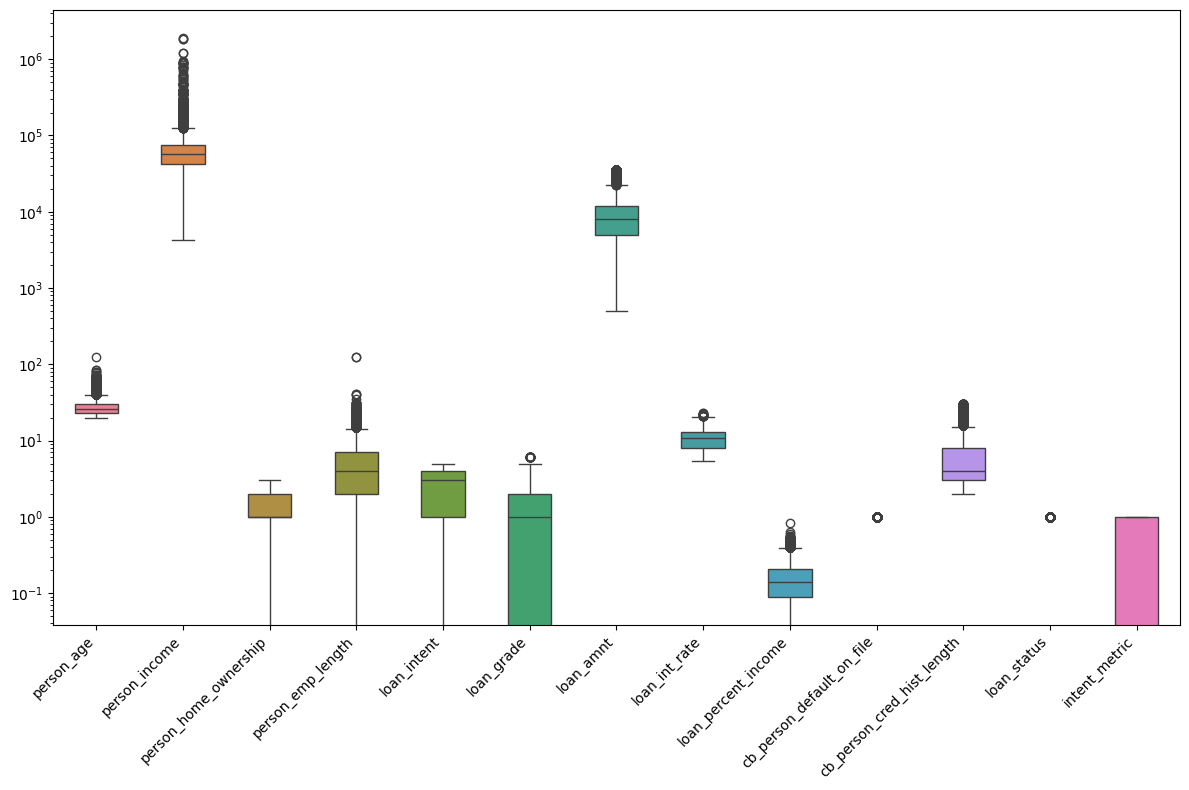

In [132]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, width=0.5)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

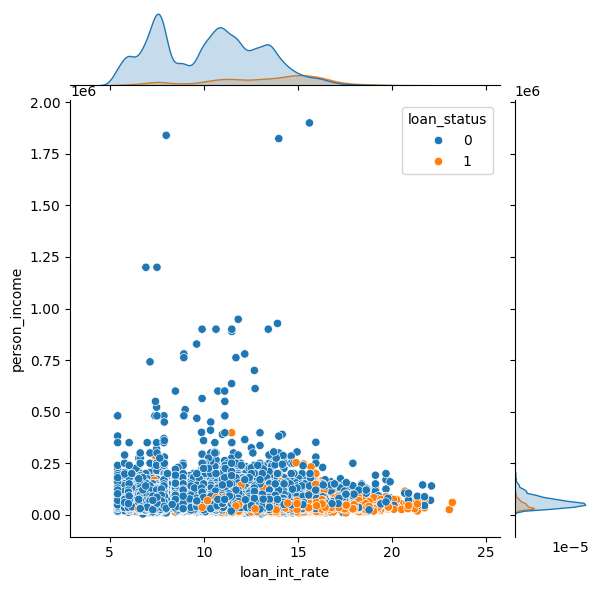

In [133]:
sns.jointplot(data=data, x='loan_int_rate', y='person_income', hue='loan_status')

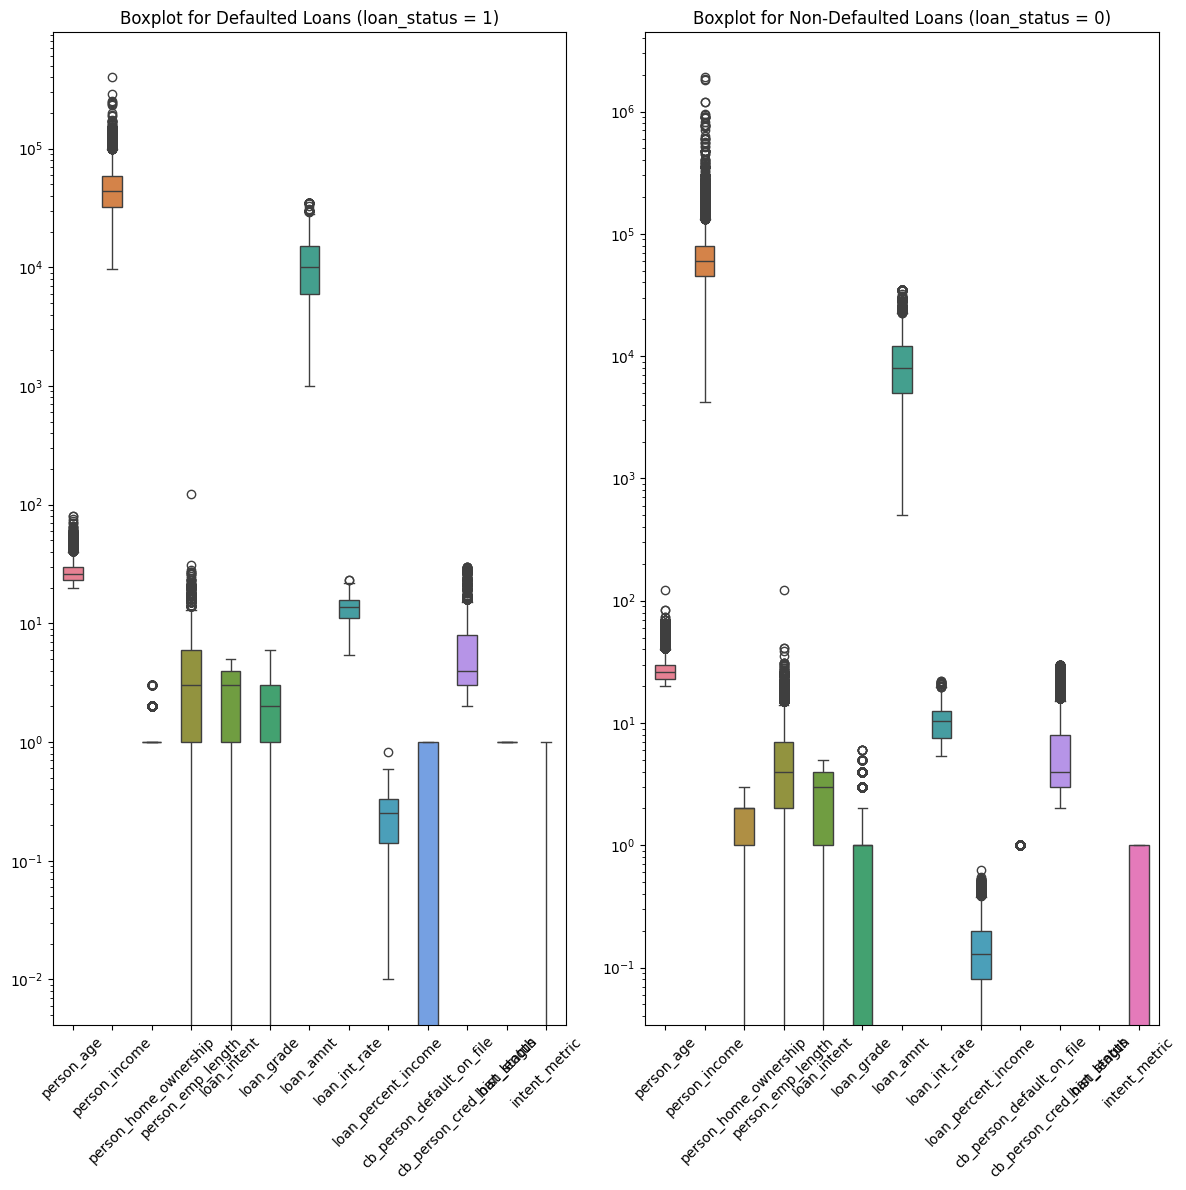

In [134]:
data_default = data[data["loan_status"] == 1]   # Filtering for defaulted loans
data_nondefault = data[data["loan_status"] == 0]
fig, ax = plt.subplots(1, 2, figsize=(12, 12))  # 2 rows, 1 column

# Boxplot for defaulted loans
sns.boxplot(data=data_default, ax=ax[0], width=0.5)
ax[0].set_title('Boxplot for Defaulted Loans (loan_status = 1)')
ax[0].set_yscale('log')  # Set y-axis to log scale
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-ticks

# Boxplot for non-defaulted loans
sns.boxplot(data=data_nondefault, ax=ax[1], width=0.5)
ax[1].set_title('Boxplot for Non-Defaulted Loans (loan_status = 0)')
ax[1].set_yscale('log')  # Set y-axis to log scale
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-ticks

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [135]:
for col in data.select_dtypes(include=["Int64", "float"]).columns:
    mean_0 = data_nondefault[col].mean()
    mean_1 = data_default[col].mean()
    print(f"{col}------------\nMean: 0:{mean_0}/1:{mean_1}\ndifference:{(mean_0-mean_1)/mean_0}\n\n")
    

person_age------------
Mean: 0:27.55363356198429/1:27.534131736526945
difference:0.0007077769040324885


person_income------------
Mean: 0:66672.86772044934/1:48224.661796407185
difference:0.2766973516332473


person_home_ownership------------
Mean: 0:1.585684461676111/1:1.1861077844311376
difference:0.2519900313727046


person_emp_length------------
Mean: 0:4.863048016701462/1:3.7250299401197604
difference:0.2340133333401884


loan_amnt------------
Mean: 0:8888.8832289492/1:11197.271856287425
difference:-0.25969388593387016


loan_int_rate------------
Mean: 0:10.258767273088775/1:13.202305389221557
difference:-0.2869290274138876


loan_percent_income------------
Mean: 0:0.14510496073168305/1:0.24436287425149703
difference:-0.6840421789807316


cb_person_cred_hist_length------------
Mean: 0:5.818530669052589/1:5.783592814371257
difference:0.006004583746057827


loan_status------------
Mean: 0:0.0/1:1.0
difference:-inf


intent_metric------------
Mean: 0:-0.042111541902773636/1:-0.19856

In [136]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106978,4200.00,42000.00,58000.00,75600.00,1900000.00
person_home_ownership,58645.0,1.528792,0.599357,0.00,1.00,1.00,2.00,3.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_intent,58645.0,2.519430,1.722896,0.00,1.00,3.00,4.00,5.00
loan_grade,58645.0,1.066638,1.046181,0.00,0.00,1.00,2.00,6.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_default_on_file,58645.0,0.148384,0.355484,0.00,0.00,0.00,0.00,1.00


<Axes: >

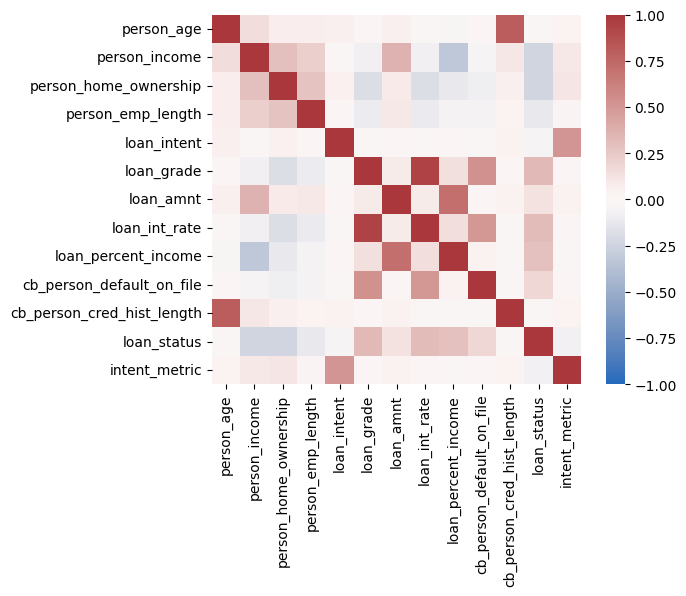

In [137]:
cm = data.corr(method="spearman")
sns.heatmap(cm,vmin=-1, vmax=1, square=True, cmap='vlag')

In [138]:
skewed_col = []
for col in data.columns:
    skew = data[col].skew()
    if abs(skew) > 1:
        print(f"{col} Skewness:{skew}", sep="")
        data[col] = np.log1p(data[col])
        print("New skewness:",data[col].skew())
        skewed_col.append(col)

skewed_col

person_age Skewness:1.9654967033657
New skewness: 1.1982618630463253
person_income Skewness:10.457722504927045
New skewness: 0.2218430047264499
person_emp_length Skewness:2.0544297052943943
New skewness: -0.4814164682526849
loan_amnt Skewness:1.1885784743437686
New skewness: -0.45868351878105695
cb_person_default_on_file Skewness:1.9783058864923366
New skewness: 1.9783058864923362
cb_person_cred_hist_length Skewness:1.6185028956126892
New skewness: 0.47023129798846974
loan_status Skewness:2.0468483311716152
New skewness: 2.046848331171616


['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'loan_status']

In [139]:

data['income_to_age'] = data['person_income'] / data['person_age']
data['loan_to_income'] = data['loan_amnt'] / data['person_income']
data['rate_to_loan'] = data['loan_int_rate'] / data['loan_amnt']
data['age_credit_history_interaction'] = data['person_age'] * data['cb_person_cred_hist_length']
data['loan_to_employment'] = data['loan_amnt'] / (data['person_emp_length'] + 0.01)
data['is_new_credit_user'] = (data['cb_person_cred_hist_length'] < 5).astype(int)
data['age_to_credit_history'] = data['person_age'] / (data['cb_person_cred_hist_length'] + 0.01)
data['log_income_to_loan'] = data['person_income'] / data['loan_amnt']
data['age_interest_interaction'] = data['person_age'] * data['loan_int_rate']
data['age_to_employment'] = data['person_age'] / (data['person_emp_length']+ 0.01)
data["DI_Ratio"] = (data['loan_amnt']*data['loan_int_rate'])/(data["person_income"]+ 0.01)
data["DI_Ratio_log"] = (data['loan_amnt']*data['loan_int_rate'])/(data['person_income']+ 0.01)
data["DI_Ratio_3"] = (data['loan_amnt']*data['loan_int_rate'])/(data["person_income"]+ 0.01)**3
data = pd.get_dummies(data,
                      columns=data.select_dtypes(include=['object']).columns, drop_first=True)


<Axes: >

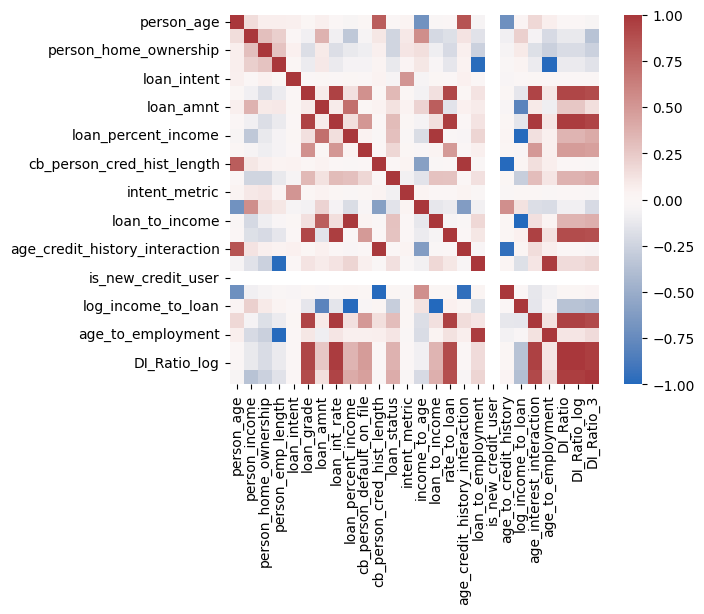

In [140]:
cm = data.corr(method="spearman")
sns.heatmap(cm,vmin=-1, vmax=1, square=True, cmap='vlag')

<Axes: >

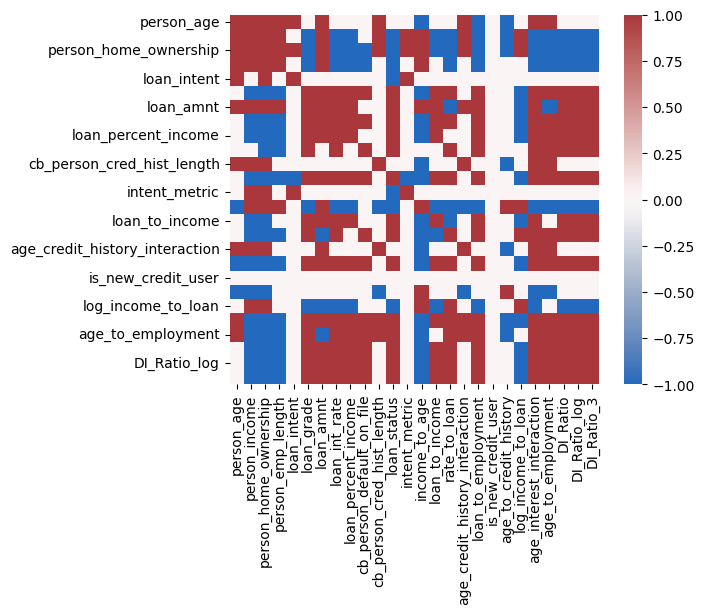

In [141]:
alpha = 0.05
cm = cm.applymap(lambda x: 1 if x > alpha else (-1 if x < -alpha else 0))

sns.heatmap(cm,vmin=-1, vmax=1, square=True, cmap='vlag')

In [144]:
correlation_threshold = 0.8
correlation_matrix = data.corr().abs()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value > correlation_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print((col1, col2, corr_value))

('person_age', 'person_income', 0.12456100177315214)
('person_age', 'person_home_ownership', 0.05224607916388303)
('person_age', 'person_emp_length', 0.052508873715984505)
('person_age', 'loan_intent', 0.06344678383745322)
('person_age', 'loan_grade', 0.01434662258937464)
('person_age', 'loan_amnt', 0.045770228740889055)
('person_age', 'loan_int_rate', 0.007605553714740633)
('person_age', 'loan_percent_income', 0.03571584496310798)
('person_age', 'cb_person_default_on_file', 0.0039887085667033115)
('person_age', 'loan_status', 0.004947198480444476)
('person_age', 'intent_metric', 0.0344220452206544)
('person_age', 'income_to_age', 0.7572282726954361)
('person_age', 'loan_to_income', 0.027024438675779743)
('person_age', 'rate_to_loan', 0.0038703602097077227)
('person_age', 'loan_to_employment', 0.002506125838096626)
('person_age', 'age_to_credit_history', 0.6699280629233517)
('person_age', 'log_income_to_loan', 0.02710531343337847)
('person_age', 'age_interest_interaction', 0.2014454160

In [142]:
#data= pd.read_csv("Final_sub.csv")

#data['loan_status'].value_counts()